#setup

In [ ]:
# Install the SQLAlchemy library if it is not installed
!sudo apt-get install python3-dev libmysqlclient-dev > /dev/null
!pip install mysqlclient > /dev/null
!sudo pip3 install -U sql_magic > /dev/null
!pip install psycopg2-binary > /dev/null'

# Google colab upgraded the default SQL Alchemy … this break pandas read_sql
# We are downgrading SQL Alchemy for now.
!pip install -U 'sqlalchemy<2.0'

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
#!pip install openai==0.28

In [ ]:
import requests
from IPython.display import HTML,display
from bs4 import BeautifulSoup
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import json
import pandas as pd
from sqlalchemy import create_engine
#import openai
import folium

In [ ]:
#openai.api_key = API_KEY

In [ ]:
conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset=utf8'.format(
    user='Cocoa',
    password='5xUzs4BPI1g=',
    host = 'jsedocc7.scrc.nyu.edu',
    port     = 3306,
    encoding = 'utf-8',
    db = 'Cocoa'
)
engine = create_engine(conn_string)

pd.read_sql('SHOW TABLES', con=engine)

%reload_ext sql_magic
%config SQL.conn_name = 'engine'

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


#from jessica's not sure what they do so i pasted them all in!
#from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
#from selenium.webdriver.common.by import By
#from selenium.webdriver.chrome.service import Service
#from selenium import webdriver
#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC
#import undetected_chromedriver as uc
#import time

# **backend:**


#sql database

viewing and managing our database tables

In [ ]:
#%%read_sql
#show tables;

pd.read_sql('SHOW TABLES', con=engine) #can use this too

#food_drink original - has all columns, unsure on what was trimmed out
#v1 - has directly relevant columns only, messed up the address concatenation lol, 23869 entries
#v2 - fixed the addresses
#v3 - dropped duplicate addresses

,Tables_in_Cocoa
0,food_drink
1,food_drink_backup
2,food_drink_v1
3,food_drink_v2
4,food_drink_v3
5,movies
6,test
7,users_ex
8,weekly_rec
9,weekly_rec_clean


In [ ]:
#df.to_sql('monthly_rec', index=False, con=engine) #adds tables

In [ ]:
#engine.execute('DROP TABLE IF EXISTS classes') #this is for if we messed up adding a table lol

In [ ]:
#making a dataframe
#weekly_rec = pd.DataFrame(scrape_timeout_weekly(url))

#sending to sql table (replace is true here!! does not add, completely overwrites!!)
#weekly_rec.to_sql(name='weekly_rec', con=engine, if_exists='replace', index=False)

In [ ]:
#columns = ['username', 'food_type_pref', 'cuisine_pref', 'restrictions', 'special_menu_pref', 'occasions_pref', 'offerings_pref', 'place_type_pref', 'features_pref']
#df = pd.DataFrame(columns=columns)
#df.to_sql('users_ex', con=engine, index=False, if_exists='replace')

cleaning our database table food_drink

In [ ]:
#write query, this is the query graveyard lol
#sql_query = ''' #
#    SELECT DBA
#    FROM food_drink
#    GROUP BY DBA
#    HAVING COUNT(*) > 25;
#'''

#sql_query = '''
#  SELECT DBA, BORO, BUILDING, STREET, ZIPCODE, CONCAT(BUILDING, ' ', STREET, ' ', ZIPCODE) AS ADDRESS, CUISINE_DESCRIPTION, Latitude, Longitude, GRADE
#  FROM food_drink;
#'''

#sql_query = '''
 # SELECT CUISINE_DESCRIPTION, COUNT(*) AS entry_count
#  FROM food_drink_backup
#  GROUP BY CUISINE_DESCRIPTION;
#'''

sql_query = '''
  SELECT *
  FROM food_drink_backup
  WHERE Latitude != 0.0 OR Longitude != 0.0
  AND CUISINE_DESCRIPTION IS NOT NULL;
  '''


In [ ]:
#assign data to the df after making a query call to the sql database
#df = pd.read_sql(sql_query, con=engine)
#df
#drop, add, sort, whatever to the data in the pandas dataframe here
#df.drop_duplicates(subset='ADDRESS', inplace=True)
#df

#converts to the main table
#df.to_sql('food_drink', index=False, if_exists = 'replace', con=engine)

In [ ]:
pd.read_sql('SELECT * FROM food_drink', con=engine)

,DBA,BORO,BUILDING,STREET,ZIPCODE,ADDRESS,CUISINE_DESCRIPTION,Latitude,Longitude,GRADE
0,FAIRFIELD INN & SUITES,Queens,14818,ARCHER AVE,11435,14818 ARCHER AVE 11435,None,40.700986095563,-73.805825205075,None
1,COQUITO BLU,Queens,1911,FRANCIS LEWIS BLVD,11357,1911 FRANCIS LEWIS BLVD 11357,None,40.780815542333,-73.802937530011,None
2,RESORT WORLD CASINO- CASINO SERVICE BAR 9,Queens,11000,ROCKAWAY BLVD,11420,11000 ROCKAWAY BLVD 11420,None,40.677664571164,-73.828757893149,None
3,LEVY AT JAVITS CENTER (Level 5),Manhattan,655,WEST 34 STREET,10001,655 WEST 34 STREET 10001,None,40.756556290303,-74.003808057183,None
4,SHERATON NEW YORK TIMES SQUARE - PANTRY 3A,Manhattan,811,7 AVENUE,10019,811 7 AVENUE 10019,None,40.762667534145,-73.982095067784,None
...,...,...,...,...,...,...,...,...,...,...
25054,CURRY MEE,Brooklyn,369,5 AVENUE,11215,369 5 AVENUE 11215,Southeast Asian,40.671278094837,-73.984531374345,None
25055,CAFE ITALIA,Bronx,500,TIFFANY STREET,10474,500 TIFFANY STREET 10474,Other,40.809905673913,-73.890098791316,None
25056,THE OVEN'S SLICE,Manhattan,84,RIVINGTON STREET,10002,84 RIVINGTON STREET 10002,Pizza,40.720327709737,-73.98918091791,None
25057,PHO TABLE,Brooklyn,6814,18 AVENUE,11204,6814 18 AVENUE 11204,Southeast Asian,40.617247851719,-73.99208647023,A


# data analysis

In [ ]:
# Data for user preferences for restaurant types
data = {
    "User": ["Joe Smith", "Taylor Kim", "Jamoe Rivera", "Chris Jordan"],
    "Breakfast + Brunch": [5, 4, 3, 2],
    "Cafes + Tea Shops": [4, 3, 2, 5],
    "Desserts": [3, 4, 5, 3],
    "Lunch": [4, 3, 4, 5],
    "Dinner": [5, 4, 3, 2],
    "Events + Festivals": [4, 3, 4, 3],
    "Bars": [3, 4, 5, 4]
}

# Create DataFrame for restaurant types
type_df = pd.DataFrame(data)

# Set User column as index
type_df.set_index('User', inplace=True)

type_df


,Breakfast + Brunch,Cafes + Tea Shops,Desserts,Lunch,Dinner,Events + Festivals,Bars
User,,,,,,,
Joe Smith,5,4,3,4,5,4,3
Taylor Kim,4,3,4,3,4,3,4
Jamoe Rivera,3,2,5,4,3,4,5
Chris Jordan,2,5,3,5,2,3,4


In [ ]:
# Data for user preferences for cuisines
data = {
    "User": ["Joe Smith", "Taylor Kim", "Jamoe Rivera", "Chris Jordan"],
    "American": [5, 4, 3, 2],
    "Greek": [4, 3, 2, 5],
    "Chinese": [3, 4, 5, 3],
    "Japanese": [4, 3, 4, 5],
    "Korean": [5, 4, 3, 2],
    "Thai": [4, 3, 4, 3],
    "Asian/Asian Fusion": [3, 4, 5, 4],
    "Indian": [5, 4, 3, 2],
    "Caribbean": [4, 3, 2, 5],
    "Southeast Asian": [3, 4, 5, 3],
    "Mediterranean": [4, 3, 4, 5],
    "French": [5, 4, 3, 2],
    "Italian": [4, 3, 4, 3],
    "Mexican": [3, 4, 5, 4],
    "Middle Eastern": [5, 4, 3, 2],
    "Spanish": [4, 3, 4, 5]
}

# Create DataFrame for cuisines
cuisine_df = pd.DataFrame(data)

# Set User column as index
cuisine_df.set_index('User', inplace=True)

cuisine_df


,American,Greek,Chinese,Japanese,Korean,Thai,Asian/Asian Fusion,Indian,Caribbean,Southeast Asian,Mediterranean,French,Italian,Mexican,Middle Eastern,Spanish
User,,,,,,,,,,,,,,,,
Joe Smith,5,4,3,4,5,4,3,5,4,3,4,5,4,3,5,4
Taylor Kim,4,3,4,3,4,3,4,4,3,4,3,4,3,4,4,3
Jamoe Rivera,3,2,5,4,3,4,5,3,2,5,4,3,4,5,3,4
Chris Jordan,2,5,3,5,2,3,4,2,5,3,5,2,3,4,2,5


In [ ]:
# Data for user preferences for dietary restrictions
dietary_data = {
    "User": ["Joe Smith", "Taylor Kim", "Jamoe Rivera", "Chris Jordan"],
    "Vegetarian": [4, 3, 5, 2],
    "Vegan": [3, 4, 2, 5],
    "Halal": [5, 4, 3, 2],
    "Kosher": [4, 3, 4, 3],
    "Gluten-free": [3, 4, 5, 4]
}

# Create DataFrame for dietary restrictions
dietary_df = pd.DataFrame(dietary_data)

# Set User column as index
dietary_df.set_index('User', inplace=True)

print("Dietary Restrictions DataFrame:")
dietary_df


Dietary Restrictions DataFrame:


,Vegetarian,Vegan,Halal,Kosher,Gluten-free
User,,,,,
Joe Smith,4,3,5,4,3
Taylor Kim,3,4,4,3,4
Jamoe Rivera,5,2,3,4,5
Chris Jordan,2,5,2,3,4


In [ ]:
# Data for user preferences for special menus
special_menus_data = {
    "User": ["Joe Smith", "Taylor Kim", "Jamoe Rivera", "Chris Jordan"],
    "Afternoon Tea": [4, 3, 5, 2],
    "Tasting Menus": [3, 4, 2, 5],
    "Prix Fixe Menus": [5, 4, 3, 2],
    "Seasonal Menus": [4, 3, 4, 3],
    "Meal Course Menus": [3, 4, 5, 4],
    "Chef's/Host's Table": [5, 4, 3, 2]
}

# Create DataFrame for special menus
special_menus_df = pd.DataFrame(special_menus_data)

# Set User column as index
special_menus_df.set_index('User', inplace=True)

print("Special Menus DataFrame:")
special_menus_df

Special Menus DataFrame:


,Afternoon Tea,Tasting Menus,Prix Fixe Menus,Seasonal Menus,Meal Course Menus,Chef's/Host's Table
User,,,,,,
Joe Smith,4,3,5,4,3,5
Taylor Kim,3,4,4,3,4,4
Jamoe Rivera,5,2,3,4,5,3
Chris Jordan,2,5,2,3,4,2


#visualization of user profiles (based off of historical inputs)

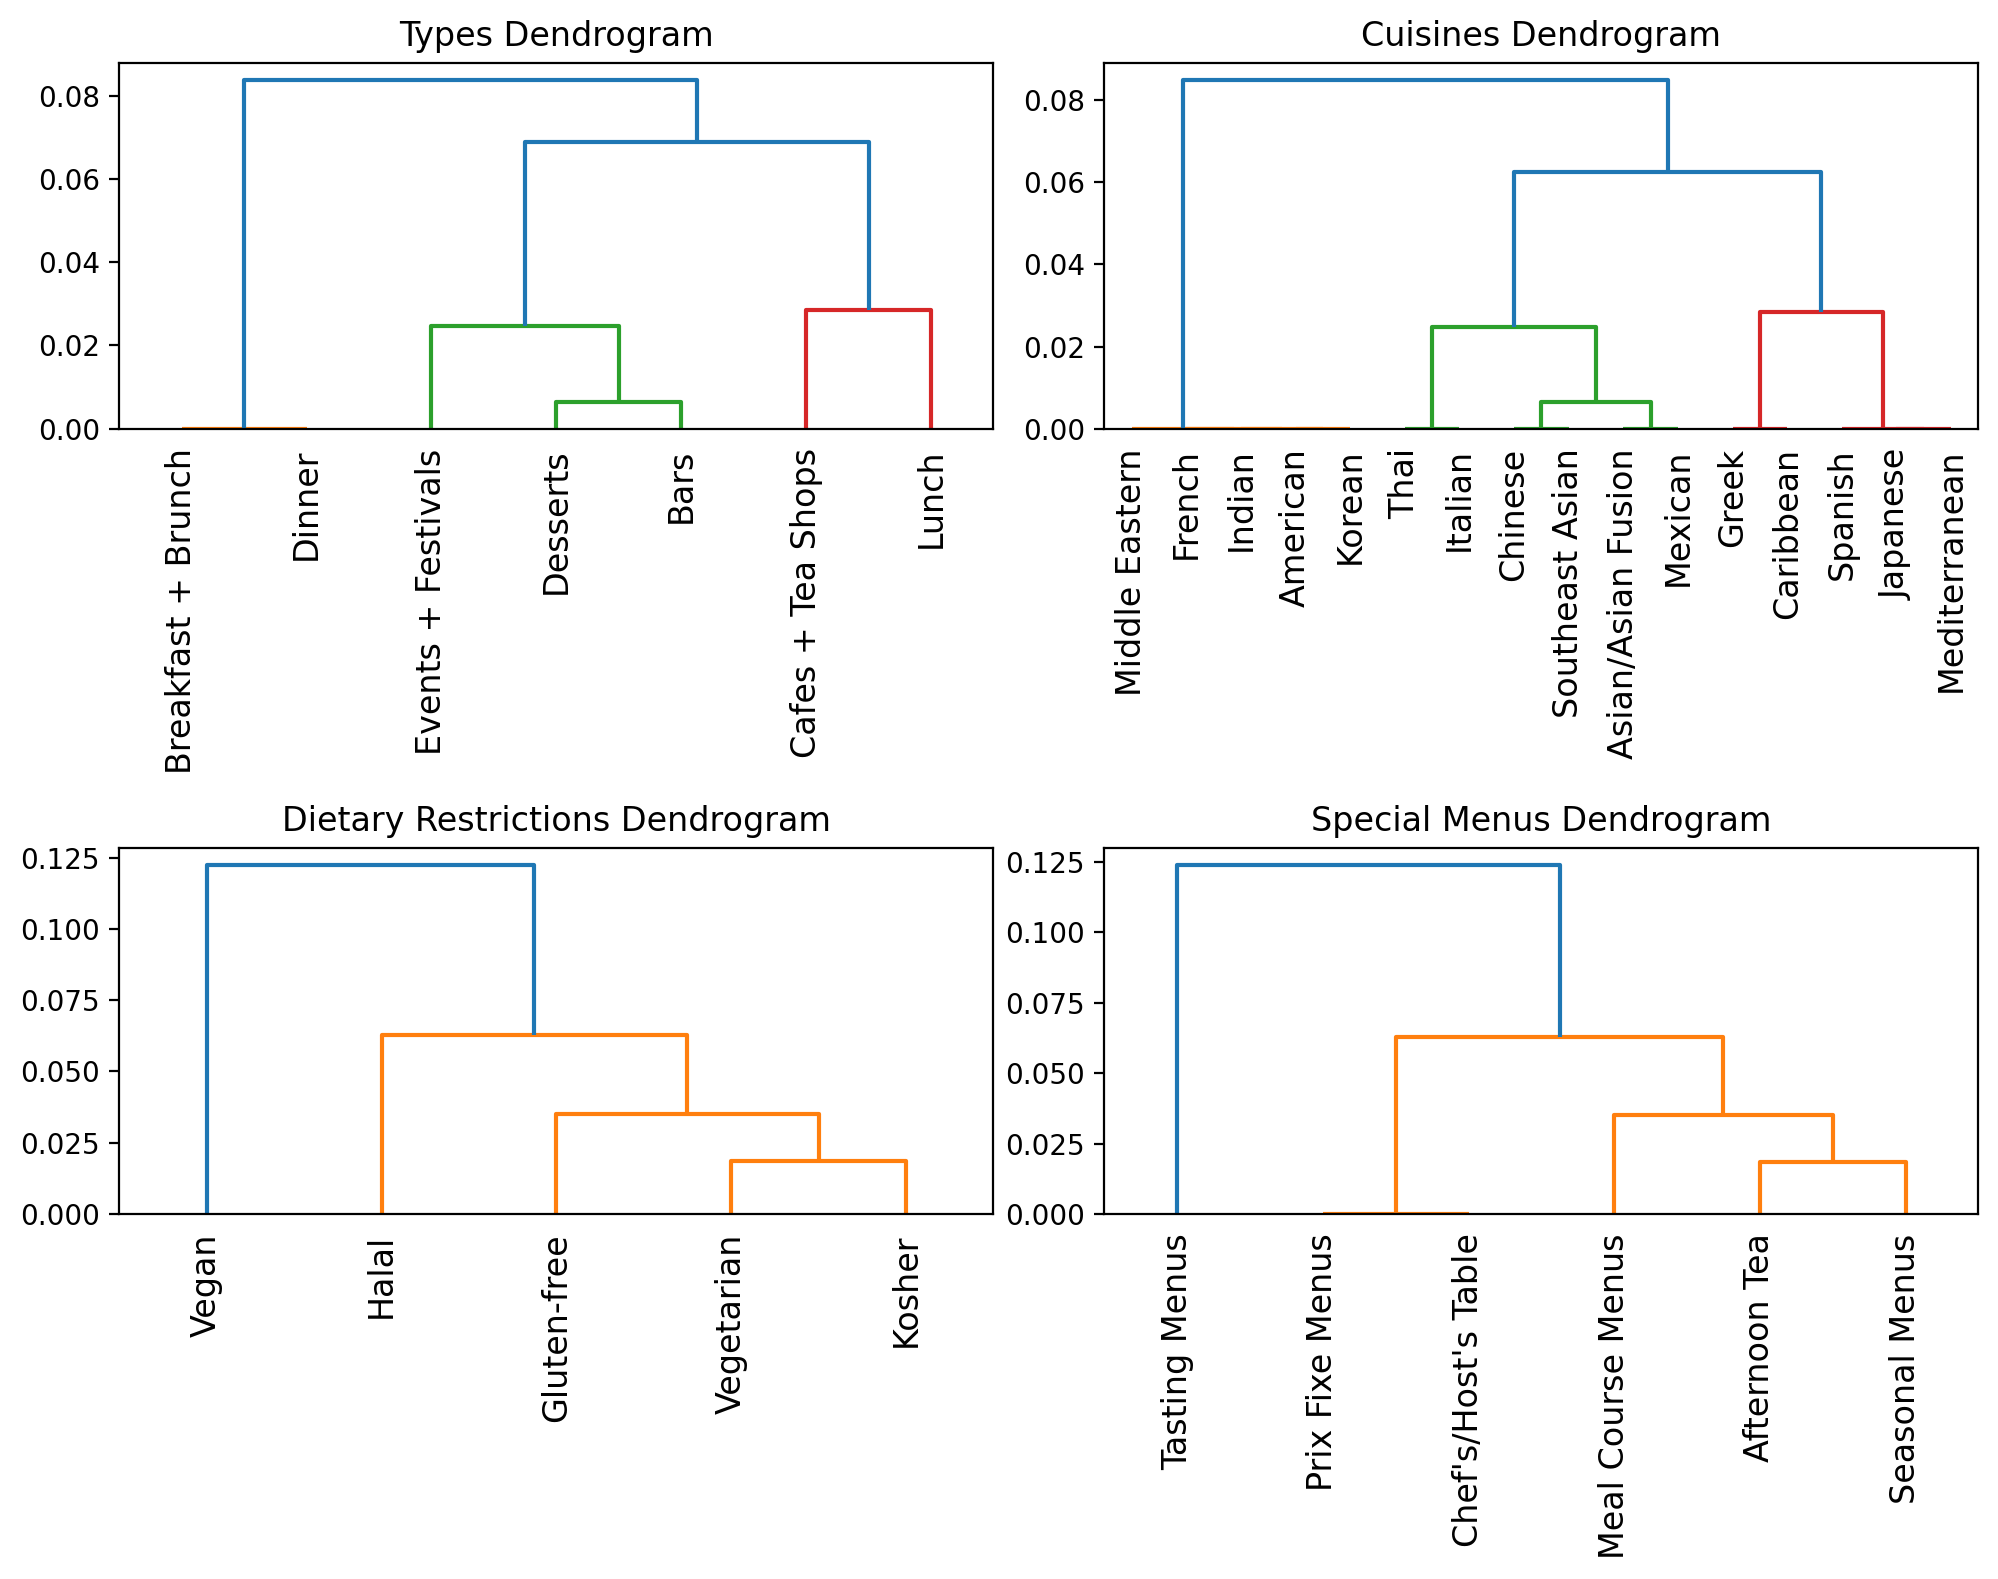

In [ ]:
from scipy.cluster import hierarchy

# Sample user preferences data for types
types_data = {
    "Breakfast + Brunch": [5, 4, 3, 2],
    "Cafes + Tea Shops": [4, 3, 2, 5],
    "Desserts": [3, 4, 5, 3],
    "Lunch": [4, 3, 4, 5],
    "Dinner": [5, 4, 3, 2],
    "Events + Festivals": [4, 3, 4, 3],
    "Bars": [3, 4, 5, 4]
}

# Sample user preferences data for cuisines
cuisines_data = {
    "American": [5, 4, 3, 2],
    "Greek": [4, 3, 2, 5],
    "Chinese": [3, 4, 5, 3],
    "Japanese": [4, 3, 4, 5],
    "Korean": [5, 4, 3, 2],
    "Thai": [4, 3, 4, 3],
    "Asian/Asian Fusion": [3, 4, 5, 4],
    "Indian": [5, 4, 3, 2],
    "Caribbean": [4, 3, 2, 5],
    "Southeast Asian": [3, 4, 5, 3],
    "Mediterranean": [4, 3, 4, 5],
    "French": [5, 4, 3, 2],
    "Italian": [4, 3, 4, 3],
    "Mexican": [3, 4, 5, 4],
    "Middle Eastern": [5, 4, 3, 2],
    "Spanish": [4, 3, 4, 5]
}


# Sample user preferences data for dietary restrictions
dietary_data = {
    "Vegetarian": [4, 3, 5, 2],
    "Vegan": [3, 4, 2, 5],
    "Halal": [5, 4, 3, 2],
    "Kosher": [4, 3, 4, 3],
    "Gluten-free": [3, 4, 5, 4]
}

# Sample user preferences data for special menus
special_menus_data = {
    "Afternoon Tea": [4, 3, 5, 2],
    "Tasting Menus": [3, 4, 2, 5],
    "Prix Fixe Menus": [5, 4, 3, 2],
    "Seasonal Menus": [4, 3, 4, 3],
    "Meal Course Menus": [3, 4, 5, 4],
    "Chef's/Host's Table": [5, 4, 3, 2]
}

# Create DataFrames
types_df = pd.DataFrame(types_data)
cuisines_df = pd.DataFrame(cuisines_data)
dietary_df = pd.DataFrame(dietary_data)
special_menus_df = pd.DataFrame(special_menus_data)

# Calculate the distance matrix using cosine distance for each category
types_dist = hierarchy.distance.pdist(types_df.T, metric='cosine')
cuisines_dist = hierarchy.distance.pdist(cuisines_df.T, metric='cosine')
dietary_dist = hierarchy.distance.pdist(dietary_df.T, metric='cosine')
special_menus_dist = hierarchy.distance.pdist(special_menus_df.T, metric='cosine')

# Perform hierarchical clustering using average linkage method
types_linkage = hierarchy.linkage(types_dist, method='average')
cuisines_linkage = hierarchy.linkage(cuisines_dist, method='average')
dietary_linkage = hierarchy.linkage(dietary_dist, method='average')
special_menus_linkage = hierarchy.linkage(special_menus_dist, method='average')

# Plot dendrograms for each category
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Types Dendrogram')
hierarchy.dendrogram(types_linkage, labels=types_df.columns, leaf_rotation=90)

plt.subplot(2, 2, 2)
plt.title('Cuisines Dendrogram')
hierarchy.dendrogram(cuisines_linkage, labels=cuisines_df.columns, leaf_rotation=90)

plt.subplot(2, 2, 3)
plt.title('Dietary Restrictions Dendrogram')
hierarchy.dendrogram(dietary_linkage, labels=dietary_df.columns, leaf_rotation=90)

plt.subplot(2, 2, 4)
plt.title('Special Menus Dendrogram')
hierarchy.dendrogram(special_menus_linkage, labels=special_menus_df.columns, leaf_rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster, linkage

# Sample user preferences data for types
types_data = {
    "Breakfast + Brunch": [5, 4, 3, 2],
    "Cafes + Tea Shops": [4, 3, 2, 5],
    "Desserts": [3, 4, 5, 3],
    "Lunch": [4, 3, 4, 5],
    "Dinner": [5, 4, 3, 2],
    "Events + Festivals": [4, 3, 4, 3],
    "Bars": [3, 4, 5, 4]
}

# Sample user preferences data for cuisines
cuisines_data = {
    "American": [5, 4, 3, 2],
    "Greek": [4, 3, 2, 5],
    "Chinese": [3, 4, 5, 3],
    "Japanese": [4, 3, 4, 5],
    "Korean": [5, 4, 3, 2],
    "Thai": [4, 3, 4, 3],
    "Asian/Asian Fusion": [3, 4, 5, 4],
    "Indian": [5, 4, 3, 2],
    "Caribbean": [4, 3, 2, 5],
    "Southeast Asian": [3, 4, 5, 3],
    "Mediterranean": [4, 3, 4, 5],
    "French": [5, 4, 3, 2],
    "Italian": [4, 3, 4, 3],
    "Mexican": [3, 4, 5, 4],
    "Middle Eastern": [5, 4, 3, 2],
    "Spanish": [4, 3, 4, 5]
}

# Sample user preferences data for dietary restrictions
dietary_data = {
    "Vegetarian": [4, 3, 5, 2],
    "Vegan": [3, 4, 2, 5],
    "Halal": [5, 4, 3, 2],
    "Kosher": [4, 3, 4, 3],
    "Gluten-free": [3, 4, 5, 4]
}

# Sample user preferences data for special menus
special_menus_data = {
    "Afternoon Tea": [4, 3, 5, 2],
    "Tasting Menus": [3, 4, 2, 5],
    "Prix Fixe Menus": [5, 4, 3, 2],
    "Seasonal Menus": [4, 3, 4, 3],
    "Meal Course Menus": [3, 4, 5, 4],
    "Chef's/Host's Table": [5, 4, 3, 2]
}

# Create DataFrames
types_df = pd.DataFrame(types_data)
cuisines_df = pd.DataFrame(cuisines_data)
dietary_df = pd.DataFrame(dietary_data)
special_menus_df = pd.DataFrame(special_menus_data)

# Calculate the distance matrix using cosine distance for each category
types_dist = hierarchy.distance.pdist(types_df.T, metric='cosine')
cuisines_dist = hierarchy.distance.pdist(cuisines_df.T, metric='cosine')
dietary_dist = hierarchy.distance.pdist(dietary_df.T, metric='cosine')
special_menus_dist = hierarchy.distance.pdist(special_menus_df.T, metric='cosine')

# Perform hierarchical clustering using average linkage method
types_linkage = hierarchy.linkage(types_dist, method='average')
cuisines_linkage = hierarchy.linkage(cuisines_dist, method='average')
dietary_linkage = hierarchy.linkage(dietary_dist, method='average')
special_menus_linkage = hierarchy.linkage(special_menus_dist, method='average')


# Define the number of clusters for each category
k_types = 5
k_cuisines = 6
k_dietary = 4
k_special_menus = 4

# Perform hierarchical clustering and get cluster labels for each category
types_cluster_labels = fcluster(types_linkage, k_types, criterion='maxclust')
cuisines_cluster_labels = fcluster(cuisines_linkage, k_cuisines, criterion='maxclust')
dietary_cluster_labels = fcluster(dietary_linkage, k_dietary, criterion='maxclust')
special_menus_cluster_labels = fcluster(special_menus_linkage, k_special_menus, criterion='maxclust')

# Create DataFrames to store category names and their corresponding cluster labels
types_clusters_df = pd.DataFrame({'Type': types_df.columns, 'Cluster': types_cluster_labels})
cuisines_clusters_df = pd.DataFrame({'Cuisine': cuisines_df.columns, 'Cluster': cuisines_cluster_labels})
dietary_clusters_df = pd.DataFrame({'Dietary Restriction': dietary_df.columns, 'Cluster': dietary_cluster_labels})
special_menus_clusters_df = pd.DataFrame({'Special Menu': special_menus_df.columns, 'Cluster': special_menus_cluster_labels})

# Print out the clusters for each category
print("Clusters for Types:")
for cluster, data in types_clusters_df.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data.Type.tolist())
    print()

print("\nClusters for Cuisines:")
for cluster, data in cuisines_clusters_df.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data.Cuisine.tolist())
    print()

print("\nClusters for Dietary Restrictions:")
for cluster, data in dietary_clusters_df.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data['Dietary Restriction'].tolist())
    print()

print("\nClusters for Special Menus:")
for cluster, data in special_menus_clusters_df.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data['Special Menu'].tolist())
    print()


Clusters for Types:
Cluster 1:
['Breakfast + Brunch', 'Dinner']

Cluster 2:
['Desserts', 'Bars']

Cluster 3:
['Events + Festivals']

Cluster 4:
['Cafes + Tea Shops']

Cluster 5:
['Lunch']


Clusters for Cuisines:
Cluster 1:
['American', 'Korean', 'Indian', 'French', 'Middle Eastern']

Cluster 2:
['Thai', 'Italian']

Cluster 3:
['Chinese', 'Southeast Asian']

Cluster 4:
['Asian/Asian Fusion', 'Mexican']

Cluster 5:
['Greek', 'Caribbean']

Cluster 6:
['Japanese', 'Mediterranean', 'Spanish']


Clusters for Dietary Restrictions:
Cluster 1:
['Vegetarian', 'Kosher', 'Gluten-free']

Cluster 2:
['Halal']

Cluster 3:
['Vegan']


Clusters for Special Menus:
Cluster 1:
['Prix Fixe Menus', "Chef's/Host's Table"]

Cluster 2:
['Afternoon Tea', 'Seasonal Menus']

Cluster 3:
['Meal Course Menus']

Cluster 4:
['Tasting Menus']



#recommendation algorithm

In [ ]:
def recommend_cuisine(user_names):
    # Retrieve users' past preferences
    combined_types = type_df.loc[user_names].mean()
    combined_cuisines = cuisine_df.loc[user_names].mean()

    # Recommend a restaurant type and cuisine based on the combined preferences
    recommended_type = combined_types.idxmax()
    recommended_cuisine = combined_cuisines.idxmax()

    return recommended_cuisine

In [ ]:
# Sample user preferences data for restaurant types
types_data = {
    "User": ["Joe Smith", "Taylor Kim", "Jamoe Rivera", "Chris Jordan"],
    "Breakfast + Brunch": [5, 4, 3, 2],
    "Cafes + Tea Shops": [4, 3, 2, 5],
    "Desserts": [3, 4, 5, 3],
    "Lunch": [4, 3, 4, 5],
    "Dinner": [5, 4, 3, 2],
    "Events + Festivals": [4, 3, 4, 3],
    "Bars": [3, 4, 5, 4]
}

# Create DataFrame for restaurant types
type_df = pd.DataFrame(types_data)

# Set User column as index
type_df.set_index('User', inplace=True)


# Sample user preferences data for cuisines
cuisines_data = {
    "User": ["Joe Smith", "Taylor Kim", "Jamoe Rivera", "Chris Jordan"],
    "American": [5, 4, 3, 2],
    "Latin American": [4, 3, 2, 5],
    "Chinese": [3, 4, 5, 3],
    "Japanese": [4, 3, 4, 5],
    "Korean": [5, 4, 3, 2],
    "Thai": [4, 3, 4, 3],
    "Asian/Asian Fusion": [3, 4, 5, 4],
    "Indian": [5, 4, 3, 2],
    "Caribbean": [4, 3, 2, 5],
    "Southeast Asian": [3, 4, 5, 3],
    "Mediterranean": [4, 3, 4, 5],
    "French": [5, 4, 3, 2],
    "Italian": [4, 3, 4, 3],
    "Mexican": [3, 4, 5, 4],
    "Middle Eastern": [5, 4, 3, 2],
    "Spanish": [4, 3, 4, 5]
}

# Create DataFrame for cuisines
cuisine_df = pd.DataFrame(cuisines_data)

# Set User column as index
cuisine_df.set_index('User', inplace=True)



# user input:
need to create variables that align with the tag categories so that users can search by them

# input functions (run whole cluster of cells)

In [ ]:
def collect_category():
  category_num = int(input("Select a category number: ")) #getting the key for the dictionary to get the category string
  categories = {
      0: 'monthly_rec',
      1: 'food_drink',
      2: 'museum_exhibition',
      3: 'theater',
      4: 'art',
      5: 'dance',
      6: 'music',
      7: 'movies',
      8: 'hands_on',
      9: 'nature_wellness',
      10: 'sports_fitness',
      11: 'nightlife_live',
      12: 'shopping',
      13: 'services',
      14: 'classes',
      #15: 'any'
  }

  if category_num in categories:
      category = categories[category_num]
      #print(category)
  else:
      print("Invalid category number selected")
  return category

In [ ]:
def collect_food_drink_types():
    subcategories = {
        1: "Meals",
        2: "Coffee/Tea",
        3: "Bakery Products/Desserts"
    }

    food_drink_type = []

    print("Select a type number:")
    for num, subcategory in subcategories.items():
        print(f"{num}: {subcategory}")

    while True:
        subcategory_num = int(input())  # Getting the subcategory key

        if subcategory_num in subcategories:
            food_drink_type.append(subcategories[subcategory_num])
            add_more = input("Do you want to add another type? (y/n): ").lower()
            if add_more != 'y':
                break
        else:
            print("Invalid category number selected")

    return food_drink_type

In [ ]:
def collect_food_drink_type():
    subcategories = {
        1: "Breakfast + Brunch",
        2: "Cafes + Tea Shops",
        3: "Desserts",
        4: "Lunch",
        5: "Dinner",
        6: "Events + Festivals",
        7: "Bars",
        8: "All"
    }

    food_drink_type = []

    print("Select a type number:")
    for num, subcategory in subcategories.items():
        print(f"{num}: {subcategory}")

    while True:
        subcategory_num = int(input())  # Getting the subcategory key

        if subcategory_num in subcategories:
            food_drink_type.append(subcategories[subcategory_num])
            add_more = input("Do you want to add another type? (y/n): ").lower()
            if add_more != 'y':
                break
        else:
            print("Invalid category number selected")

    return food_drink_type

In [ ]:
def collect_price_ranges():
    price_ranges = {
        0: "Free",
        1: "$",
        2: "$$",
        3: "$$$",
        4: "$$$$",
        5: "No preference"
    }

    selected_price_ranges = []

    for num, price in price_ranges.items():
        print(f"{num}: {price}")

    while True:
        print("Select a price range number (0-5):")

        price_num = input()
        if price_num.isdigit() and int(price_num) in price_ranges:
            selected_price_ranges.append(price_ranges[int(price_num)])
        else:
            print("Invalid price range number selected. Please try again.")

        add_more = input("Do you want to select another price range? (y/n): ").lower()
        if add_more != 'y':
            break

    return selected_price_ranges

In [ ]:
def collect_boroughs():
    boroughs = {
        1: "Manhattan",
        2: "Bronx",
        3: "Brooklyn",
        4: "Queens",
        5: "Staten Island",
        0: "Anywhere"
    }

    selected_boroughs = []

    for num, boro in boroughs.items():
        print(f"{num}: {boro}")

    while True:
        print("Select a borough number (0-5):")

        boro_num = input()
        if boro_num.isdigit() and int(boro_num) in boroughs:
            selected_boroughs.append(boroughs[int(boro_num)])
        else:
            print("Invalid borough number selected. Please try again.")

        add_more = input("Do you want to select another borough? (y/n): ").lower()
        if add_more != 'y':
            break

    return selected_boroughs

In [ ]:
def collect_borough():
    boroughs = {
        1: "Manhattan",
        2: "Bronx",
        3: "Brooklyn",
        4: "Queens",
        5: "Staten Island",
        0: "Anywhere"
    }


    for num, boro in boroughs.items():
        print(f"{num}: {boro}")

    print("Select a borough number (0-5):")

    boro_num = input()
    if boro_num.isdigit() and int(boro_num) in boroughs:
        selected_borough = boroughs[int(boro_num)]
    else:
        print("Invalid borough number selected. Please try again.")

    return selected_borough

In [ ]:
def collect_category_tags(category):
  if category == 'food_drink':
    category_tags = collect_food_drink_tags()
    print(f"\nTags selected for {category} activities:")
    for section, tags in category_tags.items():
      print(f"{section}: {tags}")
  elif category == 'museum_exhibition':
    category_tags = collect_museum_exhibition_tags()
    print(f"\nTags selected for {category} activities:")
  elif category == 'theater':
    category_tags == collect_theater_tags() #
    print(category_tags)
  elif category == 'theater':
    category_tags == collect_art_tags() #
    print(category_tags)
  elif category == 'theater':
    category_tags == collect_dance_tags() #
    print(category_tags)
  elif category == 'theater':
    category_tags == collect_music_tags() #
    print(category_tags)
  elif category == 'movies':
    category_tags = collect_movies_tags()  #
  elif category == 'hands_on':
    category_tags = collect_hands_on_tags()  #
  elif category == 'nature_wellness':
    category_tags = collect_nature_wellness_tags()  #
  elif category == 'sports_fitness':
    category_tags = collect_sports_fitness_tags()  #
  elif category == 'nightlife_live':
    category_tags = collect_nightlife_live_tags()  #
  elif category == 'shopping':
    category_tags = collect_shopping_tags()  #
  elif category == 'services':
    category_tags = collect_services_tags()  #
  elif category == 'classes':
    category_tags = collect_classes_tags() #

In [ ]:
#figure out an efficient way to actually collect info on what optional tags they want to add to the search

def collect_food_drink_tags():
    subcategories = {
        1: 'type',
        2: 'cuisines',
        3: 'dietary_restrictions',
        4: 'special_menus',
        5: 'no preference'
    }

    sections = { #dictionary of dictionaries {section {number: tag}}
        "type": {
            1: "Breakfast + Brunch",
            2: "Cafes + Tea Shops",
            3: "Desserts",
            4: "Lunch",
            5: "Dinner",
            6: "Events + Festivals",
            7: "Bars",
            8: "All"
        },
        "cuisines": {
            1: "French",
            2: "Japanese",
            3: "Italian",
            4: "Chinese",
            5: "American",
            6: "Korean",
            7: "Fusion"
        },
        "dietary_restrictions": {
            1: "Vegan",
            2: "Halal",
            3: "Vegetarian",
            4: "Kosher",
            5: "Gluten-free"
        },
        "special_menus": {
            1: "Afternoon tea",
            2: "Tasting menus",
            3: "Prix fixe menus",
            4: "Seasonal menus",
            5: "Meal course menus",
            6: "Chef's/Host's table"
        }
    }

    tags_dict = {}

    while True:
        print("Select a category number:") #prints categories
        for num, subcategory in subcategories.items(): print(f"{num}: {subcategory}")

        subcategory_num = int(input()) #getting the subcategory key

        if subcategory_num in subcategories:
            #grabs the key of the outer dictionary, assigns the value (the inner dictionary) to subcategory
            subcategory = subcategories[subcategory_num]
            if subcategory == 'no preference':
              tags_dict[subcategory] = []
              break
            #prints inner dictionary
            print(f"Please enter tags for {subcategory}:")
            for num, tag in sections[subcategory].items(): print(f"{num}: {tag}")

            selected_tags = [] #will be the value in each key-value pair

            while True:
                tag_num = int(input("Enter the tag number (0 to finish/go back): "))
                if tag_num == 0: break
                #appends the tag num in the subcategory of sections to the list
                elif tag_num in sections[subcategory]: selected_tags.append(sections[subcategory][tag_num])
                else: print("Invalid tag number.")
                #adds the selected tags list to be the value of the subcategory key
                tags_dict[subcategory] = selected_tags
        else:
            print("Invalid category number selected")

        add_more = input("Do you want to add tags from other sections? (y/n): ").lower()
        if add_more != 'y':
            break

    return tags_dict #tags_dict collects entries where the key is the subcategory and the value is a list of tags

In [ ]:
#test use, commented out for sake of running this cluster of cells quickly
#food_drink_tags = collect_food_drink_tags()
#print("\nTags selected for food and drink activities:")
#for section, tags in food_drink_tags.items():
#    print(f"{section}: {tags}")

In [ ]:
def collect_museum_exhibition_tags():
    options = {
        1: 'Time-limited',
        2: 'Science',
        3: 'History',
        4: 'Unique Things/Specialty',
        5: 'War/Military',
        6: 'Fashion',
        7: 'Cultural/Ethnographic',
        8: 'Virtual',
        9: 'Performances',
        10: 'No preference'
    }

    tags_dict = {'options': []}

    for num, option in options.items():
      print(f"{num}: {option}")
    while True:
        print("Select a tag number (0 to finish/go back):")
        tag_num = int(input())

        if tag_num == 0:
          break
        elif tag_num == 10:
          break
        elif tag_num in options:
          tags_dict['options'].append(options[tag_num])
        else:
          print("Invalid tag number.")

    return tags_dict

In [ ]:
# test use!
#museum_exhibition_tags = collect_museum_exhibition_tags()
#print("\nTags for selected categories:")
#print(museum_exhibition_tags)
#for choice, tags in museum_exhibition_tags.items():
#    print(f"{choice}: {tags}")

In [ ]:
def get_users():
  user_list = ['joe']

  while True:
        new = input("Enter a new user's name (or 'done' to finish): ").lower()
        if new.lower() == 'done':
            break
        user_list.append(new)

  return user_list #this will be fed into the data analysis and used to call the correct profiles for analysis in conjunction with the what, where, and how much inputs

In [ ]:
from datetime import date
#always will correspond to end_date = never
def get_timeframe():
  time_num = int(input("Select a time-frame number: ")) #getting the key for the dictionary to get the category string
  times = {
      1: 'today',
      2: 'tomorrow',
      3: 'week',
      4: 'month',
      5: 'specific_dates', #need to figure out how to actually do this
      6: 'never'
  }

  if time_num in times:
      time = times[time_num]
      print(time)
  else:
      print("Invalid time-frame number selected")
  return time


# Who? RUN THIS TO GET CUISINE RECOMMENDATION FOR INDIVIDUAL/GROUP OF USERS
Users are
*  Joe Smith
*  Taylor Kim
*  Jamoe Rivera
*  Chris Jordan

In [ ]:
user_names_input = input("Enter names of users (comma-separated): ")
user_names = [name.strip() for name in user_names_input.split(',')]

recommended_cuisine = recommend_cuisine(user_names)
print(f"Based on the combined preferences of {', '.join(user_names)}, we recommend trying {recommended_cuisine} cuisine.")

Enter names of users (comma-separated): Joe Smith, Taylor Kim, Jamoe Rivera, Chris Jordan
Based on the combined preferences of Joe Smith, Taylor Kim, Jamoe Rivera, Chris Jordan, we recommend trying Japanese cuisine.


# Where? RUN THIS TO COLLECT BOROUGH

In [ ]:
borough = collect_borough()
f'{borough} selected!'

1: Manhattan
2: Bronx
3: Brooklyn
4: Queens
5: Staten Island
0: Anywhere
Select a borough number (0-5):
1


'Manhattan selected!'

#response code

In [ ]:
def recommend_restaurants(borough, recommended_cuisine): #uses the input borough and the analyzed cuisine to check the database for restaurants that match those tags; in the future, both the restaurant database and the list of parameters that will be analyzed from the user's profile to generate recs will be more detailed!
  query = f'''
  SELECT *
  FROM food_drink
  WHERE BORO = '{borough}'
  AND CUISINE_DESCRIPTION = '{recommended_cuisine}'
  AND Latitude != 0.0 AND Longitude != 0.0
  LIMIT 12
  '''
  recommended_restaurants_df = pd.read_sql(query, con=engine)

  recommended = recommended_restaurants_df['DBA'].tolist()
  return recommended


In [ ]:
#getting the long/lat numbers from the list of the names of the recommended places to map them on folium

def get_coords(recommended):
  coordinates = {}

  for rec in recommended:
      query = f'''SELECT latitude, longitude FROM food_drink WHERE DBA = "{rec}"''' #maybe we rename it from DBA on the inspection database to name or something, had to use janky ''' because apostrophes in the DBA names were crashing it
      result = engine.execute(query)
      lat_long = result.fetchone()  #only grabs one!! should only be one but just in case i guess
      if lat_long:
        coordinates[rec] = (float(lat_long[0]), float(lat_long[1]))

  return coordinates

In [ ]:
def remove_zeros(coordinates):
  non_zero_coordinates = {name: coord for name, coord in coordinates.items() if all(coord) and coord != (0.0, 0.0)}
  return non_zero_coordinates

In [ ]:
print(borough, recommended_cuisine)
recommended = recommend_restaurants(borough, recommended_cuisine)
recommended

Manhattan Japanese


['SUSHI SASABUNE NEW YORK',
 'KURO-OBI',
 'SUSHI ZO',
 'HOTEL STANFORD',
 'BOHEMIAN NEW YORK',
 'RESOBOX',
 'KAPPO MASA',
 'SUSHI ZO',
 'RESTUARANT NIPPON',
 'HANA SUSHI',
 'Sugar Fish',
 'FUJI EAST']

In [ ]:
coordinates = get_coords(recommended)
coordnates = remove_zeros(coordinates)
coordinates

{'SUSHI SASABUNE NEW YORK': (40.768344563064, -73.955158023786),
 'KURO-OBI': (40.758655541558, -73.988737901106),
 'SUSHI ZO': (40.729874513639, -73.999018601686),
 'HOTEL STANFORD': (40.747679030979, -73.986729522959),
 'BOHEMIAN NEW YORK': (40.726594260409, -73.992243006922),
 'RESOBOX': (40.724818036835, -73.988054550256),
 'KAPPO MASA': (40.774514968808, -73.963447195225),
 'RESTUARANT NIPPON': (40.757510580115, -73.970881478995),
 'HANA SUSHI': (40.743584543838, -73.995997810432),
 'Sugar Fish': (40.73892898531, -73.989177885802),
 'FUJI EAST': (40.759184020215, -73.951980480125)}

In [ ]:
#list of coords, would use the query above to populate the coordinates dictionary with the coords of the recommended places, this is just here to test if my code worked
#commented out code is for if we want to have a color scale too, where the most highly recommended is a different color or something! would need to figure out how to translate that
#color coding could also be to reflect specific tags that are associated with each recommended place (like purple = outdoor, blue = reservations, etc)


#grabbing average coords so that the generated map is centered!
avg_lat = sum(lat for lat, lon in coordinates.values()) / len(coordinates)
avg_long = sum(lon for lat, lon in coordinates.values()) / len(coordinates)


map = folium.Map(location=[avg_lat, avg_long], zoom_start=14, tiles='CartoDB Positron')

for name, coords in coordinates.items():
    folium.Marker(location=coords, popup=name).add_to(map)

map.save('static_map.html') #saves as html file, easy for us to put onto the website front end later
map


#further input (user review)

In [ ]:
recommended_dict = {}
for i, item in enumerate(recommended, start=1):
    recommended_dict[i] = item

for key, value in recommended_dict.items():
    print(key, ":", value)

user_names_input = input("Enter users who visited (comma-separated): ")
user_name = [name.strip() for name in user_names_input.split(',')]

restaurant = recommended_dict[int(input("which restaurant did you go to? please enter its corresponding number: "))]

rating = int(input(f"how was your meal at {restaurant}? please rate it on a scale of 1-5!\n your rating: "))
if rating > 0:
  if rating <= 2:
    print("we're sorry to hear that ): we will work hard to make sure our recommendation next time is better!")
  elif rating == 3:
    print("thank you for your feedback! we will work hard to make sure your next time out is even better!")
  elif rating == 4 or rating == 5:
    print("thank you for your feedback! we're glad you liked it!")
  else:
    print('invalid rating! please try again')

1 : SUSHI SASABUNE NEW YORK
2 : KURO-OBI
3 : SUSHI ZO
4 : HOTEL STANFORD
5 : BOHEMIAN NEW YORK
6 : RESOBOX
7 : KAPPO MASA
8 : SUSHI ZO
9 : RESTUARANT NIPPON
10 : HANA SUSHI
11 : Sugar Fish
12 : FUJI EAST
which restaurant did you go to? please enter its corresponding number: 5
how was your meal at BOHEMIAN NEW YORK? please rate it on a scale of 1-5!
 your rating: 4
thank you for your feedback! we're glad you liked it!


# **END OF MILESTONE CODE**

In [ ]:
curr_user_index = types_data['User'].find(user_name)
if types_data['User'][curr_user_index][restaurant] >= 1:
  types_data['User'][curr_user_index][restaurant].count += 1
else:
  types_data['User'][curr_user_index][restaurant].count = 1
restaurant_score = types_data['User'][curr_user_index][restaurant].count * rating
types_data['User'][curr_user_index][restaurant].score = restaurant_score

#extra categories

In [ ]:
# Data for activities and ratings for each user profile
data = {
    "Joe Smith": [4, 3, 5, 4, 3, 5, 4, 3, 4, 3, 4, 5],  # Sample ratings for User1
    "Taylor Kim": [3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 2],  # Ratings for set 1
    "Jamoe Rivera": [5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 5, 4],  # Ratings for set 2
    "Chris Jordan": [2, 3, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4]   # Ratings for set 3
}

# Activities list
activities = [
    "Food + Drink",
    "Museums + Exhibitions",
    "Art + Dance + Music",
    "Theater",
    "Movies",
    "Hands-on Activities",
    "Nature + Wellness",
    "Sports + Fitness",
    "Nightlife + Live Entertainment",
    "Shopping",
    "Services",
    "Classes"
]

# Create DataFrame
df = pd.DataFrame(data, index=activities)

df

,Joe Smith,Taylor Kim,Jamoe Rivera,Chris Jordan
Food + Drink,4,3,5,2
Museums + Exhibitions,3,4,4,3
Art + Dance + Music,5,2,5,2
Theater,4,3,3,4
Movies,3,4,4,3
Hands-on Activities,5,2,5,4
Nature + Wellness,4,3,4,3
Sports + Fitness,3,4,3,4
Nightlife + Live Entertainment,4,3,5,3
Shopping,3,4,4,4


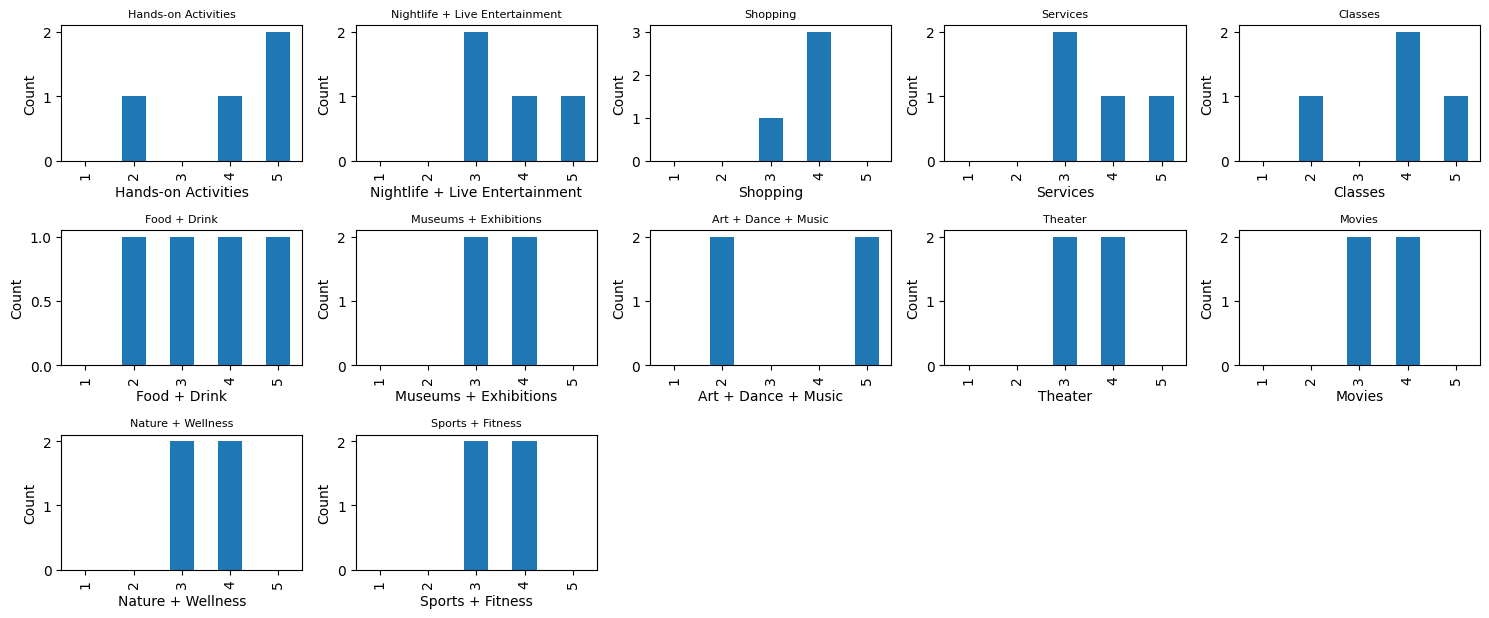

In [ ]:
# Data for activities and ratings for each user profile
data = {
    "Joe Smith": [4, 3, 5, 4, 3, 5, 4, 3, 4, 3, 4, 5],  # Sample ratings for Joe Smith
    "Taylor Kim": [3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 2],  # Sample ratings for Taylor Kim
    "Jamoe Rivera": [5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 5, 4],  # Sample ratings for Jamoe Rivera
    "Chris Jordan": [2, 3, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4]   # Sample ratings for Chris Jordan
}

# Activities list
activities = [
    "Food + Drink",
    "Museums + Exhibitions",
    "Art + Dance + Music",
    "Theater",
    "Movies",
    "Hands-on Activities",
    "Nature + Wellness",
    "Sports + Fitness",
    "Nightlife + Live Entertainment",
    "Shopping",
    "Services",
    "Classes"
]

# Create DataFrame
df = pd.DataFrame(data, index=activities)

# Sort features based on mean scores
sorted_features = df.mean(axis=1).sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(15, 10))
# Iterate over each feature
for i, feature in enumerate(sorted_features):
    # Create a subplot for each feature
    ax = plt.subplot(5, 5, i+1)

    # Reindex the value counts to include all values 1 through 5
    counts = df.loc[feature].value_counts().reindex(range(1, 6), fill_value=0)

    # Plot the bar chart
    counts.plot(kind='bar', ax=ax)

    # Set the x-axis range
    plt.xticks(range(0, 5))

    # Set the title and labels
    ax.set_title(feature, fontsize=8)
    ax.set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


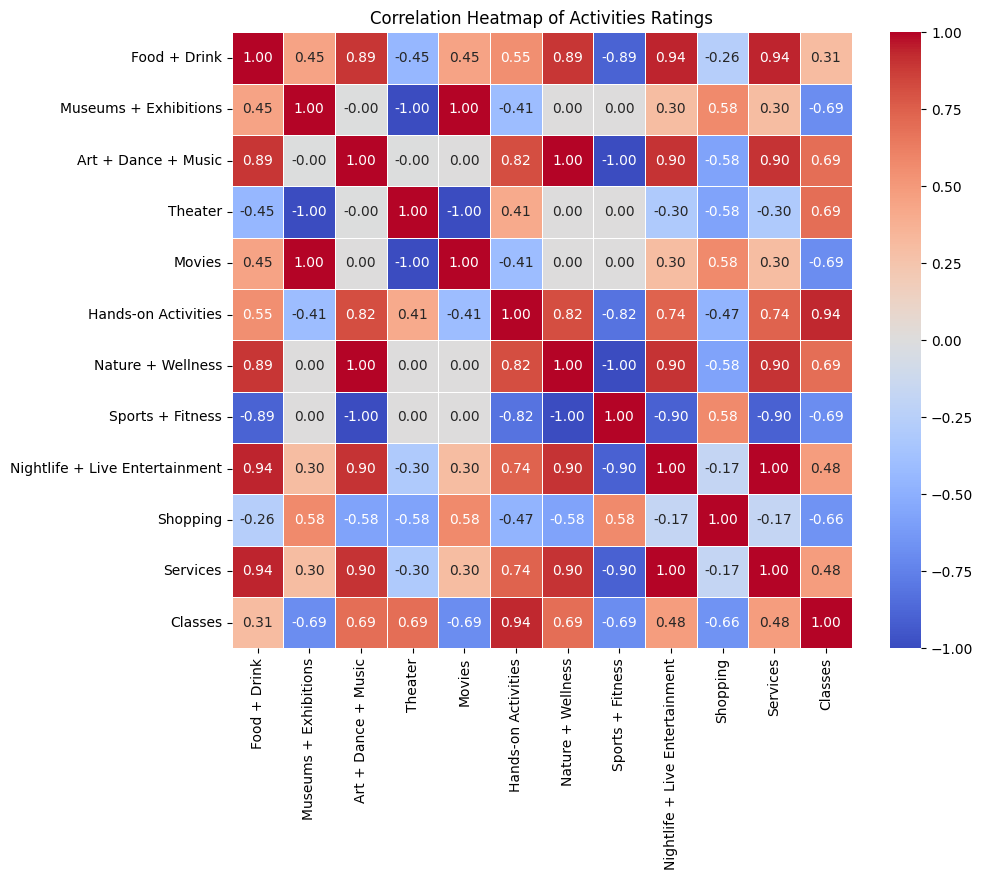

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for activities and ratings for each user profile
data = {
    "Joe Smith": [4, 3, 5, 4, 3, 5, 4, 3, 4, 3, 4, 5],  # Sample ratings for Joe Smith
    "Taylor Kim": [3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 2],  # Sample ratings for Taylor Kim
    "Jamoe Rivera": [5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 5, 4],  # Sample ratings for Jamoe Rivera
    "Chris Jordan": [2, 3, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4]   # Sample ratings for Chris Jordan
}

# Activities list
activities = [
    "Food + Drink",
    "Museums + Exhibitions",
    "Art + Dance + Music",
    "Theater",
    "Movies",
    "Hands-on Activities",
    "Nature + Wellness",
    "Sports + Fitness",
    "Nightlife + Live Entertainment",
    "Shopping",
    "Services",
    "Classes"
]

# Create DataFrame
df = pd.DataFrame(data, index=activities)

# Calculate the correlation matrix (transposing the DataFrame)
corr_matrix = df.T.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Activities Ratings')
plt.show()


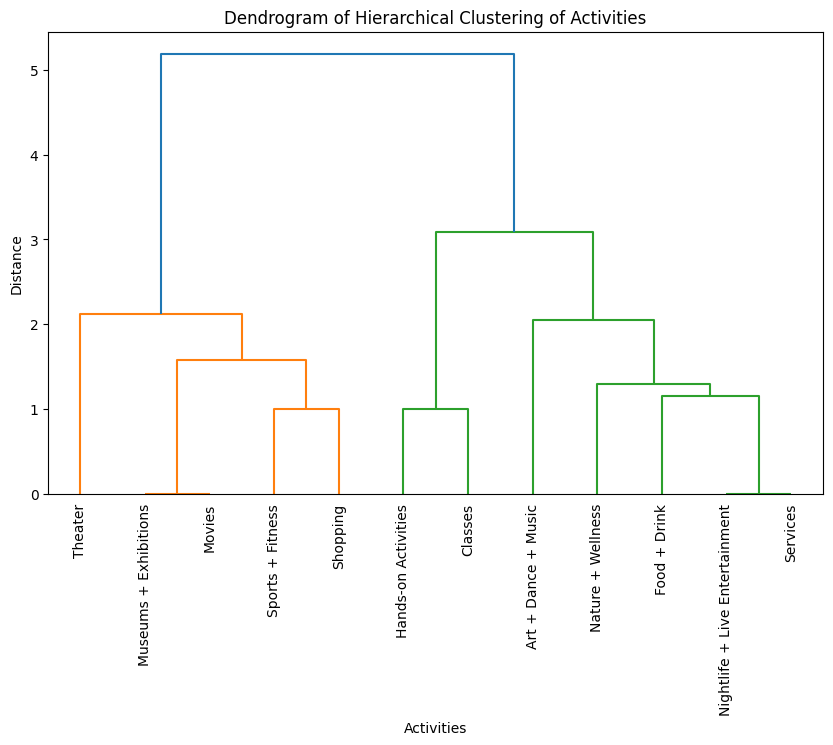

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Data for activities and ratings for each user profile
data = {
    "Joe Smith": [4, 3, 5, 4, 3, 5, 4, 3, 4, 3, 4, 5],  # Sample ratings for Joe Smith
    "Taylor Kim": [3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 2],  # Sample ratings for Taylor Kim
    "Jamie Rivera": [5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 5, 4],  # Sample ratings for Jamoe Rivera
    "Chris Jordan": [2, 3, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4]   # Sample ratings for Chris Jordan
}

# Activities list
activities = [
    "Food + Drink",
    "Museums + Exhibitions",
    "Art + Dance + Music",
    "Theater",
    "Movies",
    "Hands-on Activities",
    "Nature + Wellness",
    "Sports + Fitness",
    "Nightlife + Live Entertainment",
    "Shopping",
    "Services",
    "Classes"
]

# Create DataFrame
df = pd.DataFrame(data, index=activities)

# Calculate the linkage matrix
Z = linkage(df, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Hierarchical Clustering of Activities')
plt.xlabel('Activities')
plt.ylabel('Distance')
plt.show()


In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster, linkage

# Data for activities and ratings for each user profile
data = {
    "Joe Smith": [4, 3, 5, 4, 3, 5, 4, 3, 4, 3, 4, 5],  # Sample ratings for Joe Smith
    "Taylor Kim": [3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 2],  # Sample ratings for Taylor Kim
    "Jamoe Rivera": [5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 5, 4],  # Sample ratings for Jamoe Rivera
    "Chris Jordan": [2, 3, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4]   # Sample ratings for Chris Jordan
}

# Activities list
activities = [
    "Food + Drink",
    "Museums + Exhibitions",
    "Art + Dance + Music",
    "Theater",
    "Movies",
    "Hands-on Activities",
    "Nature + Wellness",
    "Sports + Fitness",
    "Nightlife + Live Entertainment",
    "Shopping",
    "Services",
    "Classes"
]

# Create DataFrame
df = pd.DataFrame(data, index=activities)

# Calculate the linkage matrix
Z = linkage(df, method='ward')

# Define the number of clusters
k = 10

# Perform hierarchical clustering and get cluster labels
cluster_labels = fcluster(Z, k, criterion='maxclust')

# Create a DataFrame to store activity names and their corresponding cluster labels
activity_clusters = pd.DataFrame({'Activity': df.index, 'Cluster': cluster_labels})

# Print out the activities in each cluster
for cluster, data in activity_clusters.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data.Activity.tolist())
    print()


Cluster 1:
['Museums + Exhibitions', 'Movies']

Cluster 2:
['Sports + Fitness']

Cluster 3:
['Shopping']

Cluster 4:
['Theater']

Cluster 5:
['Hands-on Activities']

Cluster 6:
['Classes']

Cluster 7:
['Nightlife + Live Entertainment', 'Services']

Cluster 8:
['Food + Drink']

Cluster 9:
['Nature + Wellness']

Cluster 10:
['Art + Dance + Music']



In [ ]:
#Recommendation Algo based on Clusters

import pandas as pd

# Data for activities and ratings for each user profile
data = {
    "Joe Smith": [4, 3, 5, 4, 3, 5, 4, 3, 4, 3, 4, 5],  # Sample ratings for Joe Smith
    "Taylor Kim": [3, 4, 2, 3, 4, 2, 3, 4, 3, 4, 3, 2],  # Sample ratings for Taylor Kim
    "Jamie Rivera": [5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 5, 4],  # Sample ratings for Jamie Rivera
    "Chris Jordan": [2, 3, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4]   # Sample ratings for Chris Jordan
}

# Activities list
activities = [
    "Food + Drink",
    "Museums + Exhibitions",
    "Art + Dance + Music",
    "Theater",
    "Movies",
    "Hands-on Activities",
    "Nature + Wellness",
    "Sports + Fitness",
    "Nightlife + Live Entertainment",
    "Shopping",
    "Services",
    "Classes"
]

# Create DataFrame
df = pd.DataFrame(data, index=activities)

# Define clusters
clusters = {
    1: ['Museums + Exhibitions', 'Movies'],
    2: ['Sports + Fitness'],
    3: ['Shopping'],
    4: ['Theater'],
    5: ['Hands-on Activities'],
    6: ['Classes'],
    7: ['Nightlife + Live Entertainment', 'Services'],
    8: ['Food + Drink'],
    9: ['Nature + Wellness'],
    10: ['Art + Dance + Music']
}

# Function to recommend activities based on cluster
def recommend_activities(user, cluster):
    cluster_activities = clusters[cluster]
    user_ratings = df[user]
    user_activities = [activity for activity, rating in user_ratings.items() if rating > 3]
    recommendations = [activity for activity in cluster_activities if activity not in user_activities]
    return recommendations

# Prompt user to input their name
user = input("Please enter your full name: ")

# Check if user exists in data
if user in df.columns:
    # Determine the cluster for the user
    for cluster, activities in clusters.items():
        if any(activity in df.index for activity in activities):
            cluster_number = cluster
            break

    # Recommend activities for the user
    recommendations = recommend_activities(user, cluster_number)
    print(f"\nRecommendations for {user}: {recommendations}")
else:
    print("User not found.")


Please enter your full name: Joe Smith

Recommendations for Joe Smith: ['Museums + Exhibitions', 'Movies']


# User Profiles

## Joe Smith